# Test of Relationship

## Correlation Test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\ORISA\\Desktop\\Python Practice\\python class\\Datasets\\ExamAnxiety.csv')

In [3]:
df

,Code,Revise,Exam,Anxiety,Gender
0,1,4,40,86.30,1
1,2,11,65,88.72,2
2,3,27,80,70.18,1
3,4,53,80,61.31,1
4,5,4,40,89.52,1
...,...,...,...,...,...
98,99,13,55,70.98,2
99,100,14,75,78.24,2
100,101,1,2,82.27,1
101,102,9,40,79.04,1


In [4]:
df.drop('Code', axis=1, inplace=True)

In [19]:
df['Gender'][df['Gender']==1]='Male'
df['Gender'][df['Gender']==2]='Female'

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
Revise     103 non-null int64
Exam       103 non-null int64
Anxiety    103 non-null float64
Gender     103 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [22]:
df.isnull()

,Revise,Exam,Anxiety,Gender
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
98,False,False,False,False
99,False,False,False,False
100,False,False,False,False
101,False,False,False,False


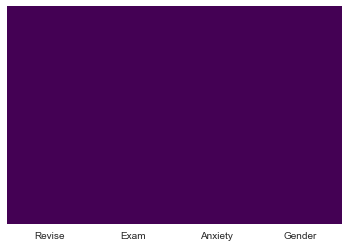

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

### Visualizing corelation

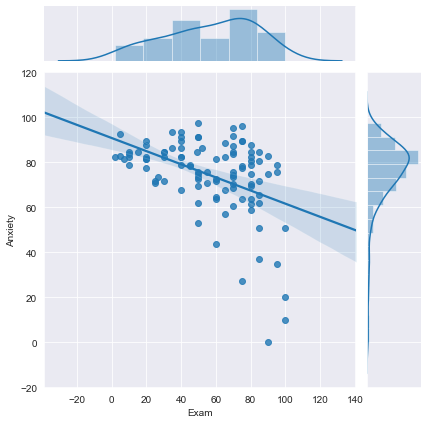

In [28]:
sns.jointplot(x='Exam',y='Anxiety', data=df, kind='reg')

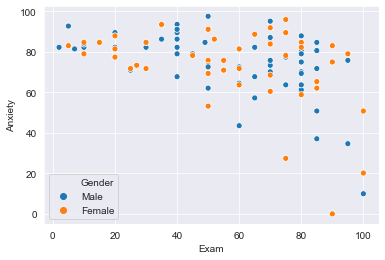

In [29]:
sns.scatterplot(x='Exam',y='Anxiety', data=df, hue="Gender")

In [5]:
corrtest =df.corr(method='pearson')
corrtest

,Revise,Exam,Anxiety,Gender
Revise,1.000000,0.396721,-0.709263,0.085351
Exam,0.396721,1.000000,-0.441004,-0.004674
Anxiety,-0.709263,-0.441004,1.000000,-0.002372
Gender,0.085351,-0.004674,-0.002372,1.000000


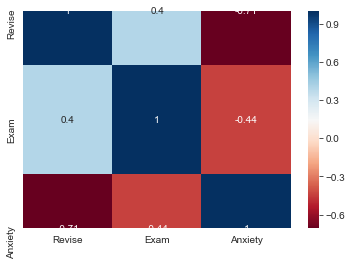

In [33]:
sns.heatmap(corrtest, annot=True, cmap='RdBu')   #this only shows the strenght and direction and not the significance 

### The Correlation Test

In [35]:
import scipy.stats

In [36]:
from scipy.stats import pearsonr, spearmanr

In [39]:
coeff_r, p_value = pearsonr(df['Exam'],df['Anxiety'])

In [42]:
print('The correlation r = %.2f \n The p_value = %.2f'%(coeff_r, p_value))

The correlation r = -0.44 
 The p_value = 0.00


In [43]:
#decision rule
alpha =0.05

if p_value >= alpha:
    print('There is no significant relation between Anxiety and Exam performance')
else:
    print('There is significant relation between Anxiety and Exam performance')

There is significant relation between Anxiety and Exam performance


In [51]:
def correlation(x,y,z):
    coeff_r, p_value = pearsonr(x,y)
    
    #decision rule
    alpha = z

    if p_value >= alpha:
        print('There is no significant relation between Anxiety and Exam performance')
    else:
        print('There is significant relation between Anxiety and Exam performance')

In [53]:
correlation(df['Exam'],df['Anxiety'],0.01)

There is significant relation between Anxiety and Exam performance


#  Test of Difference z-test with large sample size, t-test with low sample size(30,40)

In [56]:
pip install researchpy


Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install bioinfokit

  Created wheel for bioinfokit: filename=bioinfokit-2.0.6-cp37-none-any.whl size=57094 sha256=15a75ab70349065b6b8835ff8d9c92b0974740422f890adad8294c09c9afb697
  Stored in directory: C:\Users\ORISA\AppData\Local\pip\Cache\wheels\5a\f8\64\e41075ca63cf7d9a0de4bc61e5afab444d317d741dd4b5a7c7
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.6-cp37-none-any.whl size=32069 sha256=357bbda27f5736561271bc7403fad5bf28883e0b1439254e7140516355f6adf2
  Stored in directory: C:\Users\ORISA\AppData\Local\pip\Cache\wheels\c5\9c\ac\77b0c9151c4c264bec6ba18120d73bb24df5b4c1f09c17a41c
  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7104 sha256=a46ce1849def246931090d027583754981770a98ebe0a78f1da6cfb39b828c38
  Stored in directory: C:\Users\ORISA\AppData\Local\pip\Cache\wheels\41\95\74\7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built bioinfokit matplotlib-venn adjustText
Note: you may need to restart the kernel to use updated packages.


In [1]:
import researchpy
import bioinfokit

In [2]:
from scipy import stats as st
from bioinfokit.analys import get_data
from bioinfokit.analys import stat
import researchpy as rp


### one sample t- test: one variable against an hypothesized mean

In [35]:
df = get_data('t_one_samp').data   #one variable against an hypothesized mean

In [6]:
df.head()

,size
0,5.739987
1,5.254042
2,5.152388
3,4.870819
4,3.536251


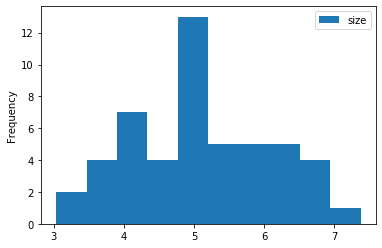

In [7]:
df.plot.hist()

In [23]:
df1 = df['size'].to_numpy()

In [18]:
df

array([5.73998725, 5.25404227, 5.15238834, 4.87081905, 3.53625064,
       6.25717079, 5.67399212, 4.49975755, 4.32676488, 5.03792595,
       3.03686598, 5.18216044, 4.99427902, 3.91368411, 4.80401254,
       4.4536053 , 4.42941836, 4.10680117, 4.83134172, 6.12282451,
       5.00936774, 4.50611441, 5.29967781, 4.81613333, 3.33872827,
       6.20310606, 4.85366638, 5.41723274, 6.58384684, 5.10426761,
       4.02122049, 3.99308312, 5.41710494, 6.29843941, 3.80142355,
       5.34204192, 4.16098619, 4.78060505, 4.22507227, 7.37100455,
       6.55667429, 6.61408012, 5.86276128, 6.62984248, 5.91642598,
       6.25304554, 3.88957758, 5.6923657 , 4.85272771, 3.52936383])

In [24]:
st.ttest_1samp(df1,popmean=5)

Ttest_1sampResult(statistic=0.36789006583267403, pvalue=0.714539654336473)

since p_value = 0.714 > 0.05 we have statistical evidence to Acceot H0 and conclude that the mean cloth is 5

In [36]:
res = stat()
res.ttest(df,test_type=1, res='size', mu=5)     #test_type=1 is one sample t_test, 2 is independent, 3 is paired smaple

In [37]:
print(res.summary)


One Sample t-test 

------------------  --------
Sample size         50
Mean                 5.05128
t                    0.36789
Df                  49
P-value (one-tail)   0.35727
P-value (two-tail)   0.71454
Lower 95.0%          4.77116
Upper 95.0%          5.3314
------------------  --------


### Paired Sample t-test

correlation checks for relationship between while paired smaple t test check for the difference in gorups of the same population

In [32]:
df2 = get_data('t_pair').data
df2.head()

,BF,AF
0,44.41,47.99
1,46.29,56.64
2,45.98,48.90
3,43.35,49.01
4,45.75,48.41


In [34]:
res = stat()

res.ttest(df2,res=['AF','BF'],test_type=3)
print(res.summary)


Paired t-test 

------------------  ------------
Sample size         65
Difference Mean      5.55262
t                   14.2173
Df                  64
P-value (one-tail)   8.87966e-22
P-value (two-tail)   1.77593e-21
Lower 95.0%          4.7724
Upper 95.0%          6.33283
------------------  ------------


## Independent sample t-test

In [55]:
import pandas as pd
df3= pd.read_csv('C:\\Users\\ORISA\\Desktop\\Python Practice\\python class\\Datasets\\Lung Cap.csv')

In [47]:
df3.head()


,Gender,Height,Smoker,Exercise,Age,Lung Capacity
0,Male,69.5,Non-smoker,25,47,5673
1,Male,70.1,Non-smoker,24,67,5632
2,Male,68.2,Non-smoker,26,36,5712
3,Male,70.9,Non-smoker,26,68,5723
4,Male,71.9,Smoker,20,58,5484


In [53]:
df3.columns

Index(['Gender', 'Height', 'Smoker', 'Exercise', 'Age', 'Lung Capacity '], dtype='object')

In [63]:
male_group=df3['Lung Capacity '][df3['Gender']=='Male']

In [68]:
female_group=df3['Lung Capacity '][df3['Gender']=='Female']

In [65]:
male_group_mean=df3['Lung Capacity '][df3['Gender']=='Male'].mean()

In [69]:
female_group_mean=df3['Lung Capacity '][df3['Gender']=='Female'].mean()

In [70]:
st.ttest_ind(female_group,male_group)

Ttest_indResult(statistic=-3.4399381725798803, pvalue=0.0008562245467052017)

In [74]:
summary,result=rp.ttest(group1=female_group,
                        group2=male_group,
                       group1_name='Female',
                       group2_name='Male')

print(summary)

   Variable      N     Mean          SD         SE    95% Conf.     Interval
0    Female   50.0  5191.54  391.492133  55.365348  5080.279167  5302.800833
1      Male   50.0  5459.64  387.873941  54.853659  5349.407446  5569.872554
2  combined  100.0  5325.59  410.454813  41.045481  5244.146860  5407.033140


In [75]:
print(result)

              Independent t-test   results
0  Difference (Female - Male) =  -268.1000
1          Degrees of freedom =    98.0000
2                           t =    -3.4399
3       Two side test p value =     0.0009
4      Difference < 0 p value =     0.0004
5      Difference > 0 p value =     0.9996
6                   Cohen's d =    -0.6880
7                   Hedge's g =    -0.6827
8               Glass's delta =    -0.6848
9                 Pearson's r =     0.3282


## Anova Test

check difference in mean of categorical 




anova looks at the significant impact of factors(catgorical) on dependedent variable 
regression is checking for effect of factor(numerical/ordinal) on a dependent variable

In [76]:
pwd


'C:\\Users\\ORISA\\Desktop\\Python Practice\\python class'

In [94]:
df4= pd.read_csv('C:\\Users\\ORISA\\Desktop\\Python Practice\\python class\\Datasets\\PlantGrowth.csv')

In [79]:
df4.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [80]:
df4.group.unique()

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [91]:
df4.group.value_counts()

ctrl    10
trt2    10
trt1    10
Name: group, dtype: int64

In [84]:
df4.columns

Index(['Unnamed: 0', 'weight', 'group'], dtype='object')

In [95]:
df4.drop('Unnamed: 0', axis=1, inplace=True)


In [96]:
df4.head()

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


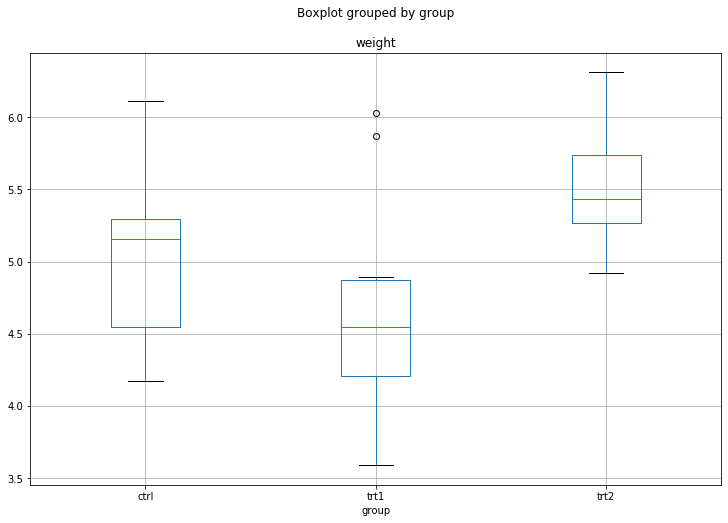

In [99]:
df4.boxplot('weight',by='group', figsize=(12,8))

In [100]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


### One way Anova

In [103]:
model1 = ols('weight~group', data=df4).fit()

In [104]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     4.846
Date:                Thu, 16 Sep 2021   Prob (F-statistic):             0.0159
Time:                        15:33:27   Log-Likelihood:                -26.810
No. Observations:                  30   AIC:                             59.62
Df Residuals:                      27   BIC:                             63.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.0320      0.197     25.527      0.000       4.628       5.436
group[T.trt1]    -0.3710      0.279     -1.331      0.194      -0.943       0.201
group[T.trt2]     0.4940      0.279      1.772      0.088      -0.078       1.066
==============================================================================
Omnibus:                        1.835   Durbin-Watson:                   2.704
Prob(Omnibus):                  0.400   Jarque-Bera (JB):                1.406
Skew:                           0.524   Prob(JB):                        0.495
Kurtosis:                       2.835   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
anova_table = sm.stats.anova_lm(model1, type=2)  # use type 2 when both variables have same sample size are equal
print(anova_table)

            df    sum_sq   mean_sq         F   PR(>F)
group      2.0   3.76634  1.883170  4.846088  0.01591
Residual  27.0  10.49209  0.388596       NaN      NaN


#### pairwise test inplace of post-hoc test

pip install pingoiun

this unistall packages from the module

so we run a pairwise test which is close to the post-hoc test

In [107]:
pair_t = model1.t_test_pairwise('group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
trt1-ctrl,-0.371,0.278782,-1.330791,0.194388,-0.943013,0.201013,0.194388,False
trt2-ctrl,0.494,0.278782,1.771996,0.087682,-0.078013,1.066013,0.167675,False
trt2-trt1,0.865,0.278782,3.102787,0.004459,0.292987,1.437013,0.013318,True


In [117]:
df5 = pd.read_excel('C:\\Users\\ORISA\\Desktop\\Python Practice\\python class\\Datasets\\need.xlsx')

In [113]:
df5


,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [120]:
df5.columns

Index(['A ', 'B', 'C', 'D'], dtype='object')

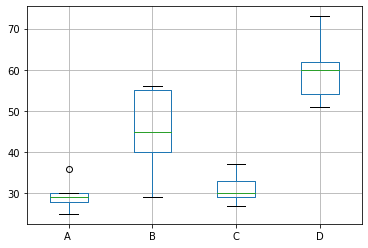

In [121]:
df5.boxplot(column=['A ','B','C','D'])

In [122]:
d_melt=pd.melt(df5.reset_index(), id_vars=['index'], value_vars=['A ','B','C','D'])

In [123]:
d_melt.head()

,index,variable,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29


In [124]:
model2 = ols('value~variable', data=d_melt).fit()

In [125]:
anova_table2= sm.stats.anova_lm(model2, type=2)
print(anova_table2)

            df   sum_sq   mean_sq         F    PR(>F)
variable   3.0  3010.95  1003.650  17.49281  0.000026
Residual  16.0   918.00    57.375       NaN       NaN


In [126]:
pair_t = model2.t_test_pairwise('variable')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
B-A,15.4,4.790616,3.214618,0.005409,5.244348,25.555652,0.021461,True
C-A,1.6,4.790616,0.333986,0.742727,-8.555652,11.755652,0.742727,False
D-A,30.4,4.790616,6.345739,0.000010,20.244348,40.555652,0.000058,True
C-B,-13.8,4.790616,-2.880632,0.010869,-23.955652,-3.644348,0.021620,True
D-B,15.0,4.790616,3.131121,0.006445,4.844348,25.155652,0.021461,True
D-C,28.8,4.790616,6.011753,0.000018,18.644348,38.955652,0.000091,True


## Two way Anova

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from bioinfokit.analys import get_data
from bioinfokit.analys import stat
import researchpy as rp


### repeating items in numpy

In [2]:
np.repeat(['Male','Female'],5)

array(['Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female'], dtype='<U6')

In [3]:
np.tile(np.repeat(['Male','Female'],5),2)

array(['Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Female', 'Female', 'Female', 'Female'],
      dtype='<U6')

In [14]:
df = pd.DataFrame({'Group':np.tile(np.repeat(['Male','Female'],5),2),
                  'Protein':np.repeat(['High','Low'],10),
                  'FitnessTest':[10,7,9,6,8,5,4,6,3,2,5,4,7,4,5,3,4,5,1,2]
                  })

In [15]:
df.head()

,Group,Protein,FitnessTest
0,Male,High,10
1,Male,High,7
2,Male,High,9
3,Male,High,6
4,Male,High,8


### interactive plot: visualization for interaction between groups

In [10]:
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.api as sm
from statsmodels.formula.api import ols
sns.set_style('darkgrid')

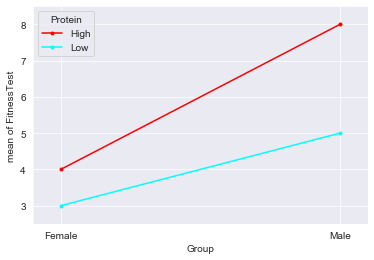

In [16]:
fig = interaction_plot(df['Group'],df['Protein'],df['FitnessTest'])

In [20]:
model1 = ols('FitnessTest~Group + Protein + Group:Protein', data=df).fit()  #Group:Protien to check interaction between groups
av_table = sm.stats.anova_lm(model1, type=2)
av_table

,df,sum_sq,mean_sq,F,PR(>F)
Group,1.0,45.0,45.00,20.000000,0.000385
Protein,1.0,20.0,20.00,8.888889,0.008814
Group:Protein,1.0,5.0,5.00,2.222222,0.155487
Residual,16.0,36.0,2.25,NaN,NaN


In [22]:
pairwisetest = model1.t_test_pairwise('Protein')
pairwisetest.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Low-High,-1.0,0.948683,-1.054093,0.307499,-3.011119,1.011119,0.307499,False


In [23]:
pairwisetest = model1.t_test_pairwise('Group')
pairwisetest.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Male-Female,4.0,0.948683,4.21637,0.000656,1.988881,6.011119,0.000656,True


# Chi-Square

The test of independence is just used to compare relationship like correlation but it accomodates categorical variable where correlation does not

In [43]:
 # \ is addinging to newline
data = [['18-29','Coservative'] for i in range(141)] + \
[['18-29','Socialist'] for i in range(68)] + \
[['18-29','Others'] for i in range(4)] + \
[['30-44','Coservative'] for i in range(179)] + \
[['30-44','Socialist'] for i in range(159)] + \
[['30-44','Others'] for i in range(7)] + \
[['45-64','Coservative'] for i in range(220)] + \
[['45-64','Socialist'] for i in range(216)] + \
[['45-64','Others'] for i in range(4)] + \
[['65 & Older','Coservative'] for i in range(86)] + \
[['65 & Older','Socialist'] for i in range(101)] + \
[['65 & Older','Others'] for i in range(4)] 

In [52]:
df= pd.DataFrame(data=data, columns=['Age Group','Political Affliation'])
df.head()

,Age Group,Political Affliation
0,18-29,Coservative
1,18-29,Coservative
2,18-29,Coservative
3,18-29,Coservative
4,18-29,Coservative


### cross tablulation

In [53]:
df_crosstab = pd.crosstab(df['Age Group'],df['Political Affliation'], margins=True, margins_name='Total')

In [54]:
df_crosstab

Political Affliation,Coservative,Others,Socialist,Total
Age Group,,,,
18-29,141,4,68,213
30-44,179,7,159,345
45-64,220,4,216,440
65 & Older,86,4,101,191
Total,626,19,544,1189


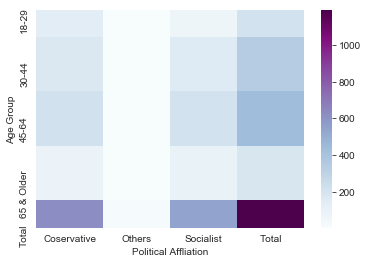

In [55]:
sns.heatmap(df_crosstab,cmap='BuPu');

In [56]:
chi_square = 0
rows = df['Age Group'].unique()
columns= df['Political Affliation'].unique()


In [78]:
df_crosstab

Political Affliation,Coservative,Others,Socialist,Total
Age Group,,,,
18-29,141,4,68,213
30-44,179,7,159,345
45-64,220,4,216,440
65 & Older,86,4,101,191
Total,626,19,544,1189


In [76]:
rows

array(['18-29', '30-44', '45-64', '65 & Older'], dtype=object)

In [77]:
columns

array(['Coservative', 'Socialist', 'Others'], dtype=object)

In [87]:
df_crosstab['Others']['Total']

19

In [86]:
df_crosstab['Total']['18-29']

213

In [81]:
# when calling values from a crosstab it is [column][row]
for i in columns:
    for j in rows:
        O = df_crosstab[i][j]
        E = df_crosstab[i]['Total']*df_crosstab['Total'][j]/df_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [58]:
chi_square

24.367421717305202

In [68]:
# The p-value
alpha = 0.5
p_value = 1-st.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))

In [69]:
p_value

0.0

In [75]:
conclusion = 'Failed to reject the Null Hypothesis'

if p_value <= alpha:
    conclusion = "Null Hypothesis Rejected"
    
print('Chi_square score is %.3f, and the p_value is %.3f'%(chi_square,p_value))
print(conclusion)

Chi_square score is 24.367, and the p_value is 0.000
Null Hypothesis Rejected


In [82]:
[]

[]